In [9]:
import numpy as np
import pandas as pd
import xarray as xr
import math as mt
from joblib import dump, load
import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import  RandomizedSearchCV
from time import time
from scipy.stats import uniform
from sklearn.utils.fixes import loguniform
import matplotlib.pyplot as plt
from scipy.stats import randint

In [10]:
# Load Inputs
# Load X and y values
X = load('X.joblib') 
y= load('y.joblib')


In [11]:
X_train,X_test,y_train,y_test= train_test_split(X ,y,test_size=0.20, random_state=0)

Coefficient of determination of base SVR model on test data is , 0.5651633324968113
0.7523273462561013
0.7459750969723004


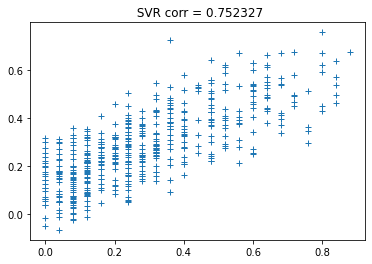

In [12]:
regLin=SVR(C=30,gamma='scale',kernel='rbf',epsilon=0.01).fit(X_train, y_train)
acc_svr       =regLin.score(X_test, y_test) 
print("Coefficient of determination of base SVR model on test data is ,",(acc_svr))
yy_test = regLin.predict(X_test)
test_corr = np.corrcoef(yy_test,y_test)[0,1]
plt.title(' SVR corr = %f'%test_corr)
plt.plot(y_test,yy_test,'+')
#dump(regLin, 'SVRModel.joblib') 
print(np.corrcoef(yy_test,y_test)[0,1])
yy_train=regLin.predict(X_train)
print(np.corrcoef(yy_train,y_train)[0,1])

In [13]:
yLR=regLin.predict(X)
y_predLin_ds=xr.Dataset({'yLR': (('time'), yLR)}, coords={'time': y.time})
#dump(y_predLin_ds.yLR,'TSdataSVR.joblib')

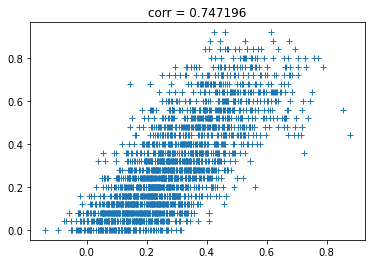

In [14]:
    test_corr = np.corrcoef(yLR,y)[0,1]
    plt.title('corr = %f'%test_corr)

    plt.plot(yLR,y,'+')

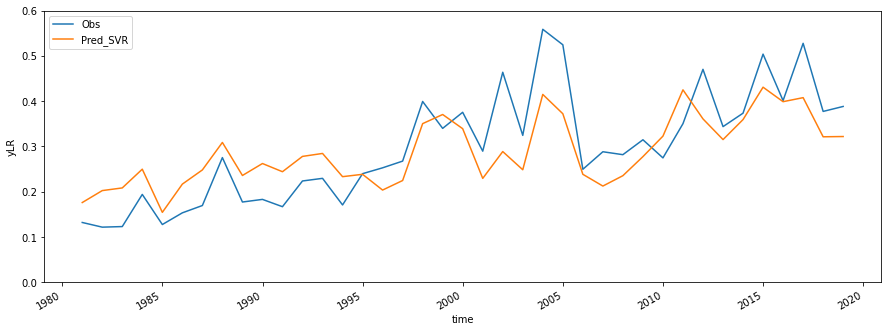

In [15]:


plt.figure(figsize=[15,5])
y.resample(time='1Y').mean().plot(label='Obs')
y_predLin_ds.resample(time='1Y').mean().yLR.plot(label='Pred_SVR')
#dump(y,'TS1dataObs_1.joblib')
plt.ylim(0, 0.6)
plt.legend()


In [16]:
#dump(y_predLin_ds.yLR,'SVRY.joblib')